Use [./layout.py](./layout.py) to illustrate some layout algebra basics.

In [33]:
from layout import Layout

import hilt.eager.api as cute
visualize_and_return = lambda layout: (layout, layout.visualize(dpi=50))[0]

## Permutation

Let's simulate a 3D shape and stride `(3, 2, 8):(2, 8, 1)`:

(3, 2, 8):(16, 8, 1)


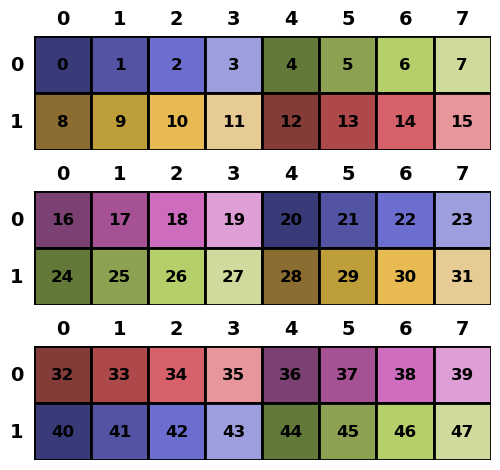

In [34]:
A = Layout(shape=(3, 2, 8), stride=(16, 8, 1))
print(A); A.visualize()

When it is reshaped, we remap both the shape and stride axises:

(2, 8, 3):(8, 1, 16)


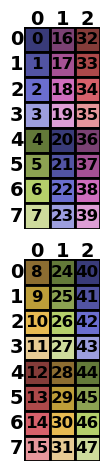

In [35]:
B = A.permute(1, 2, 0)
print(B); B.visualize()

## Composition

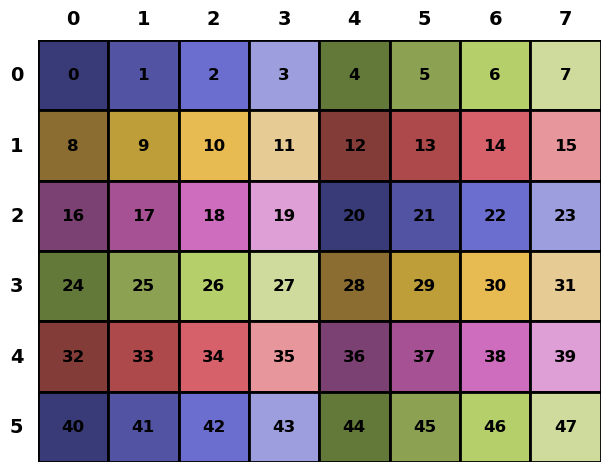

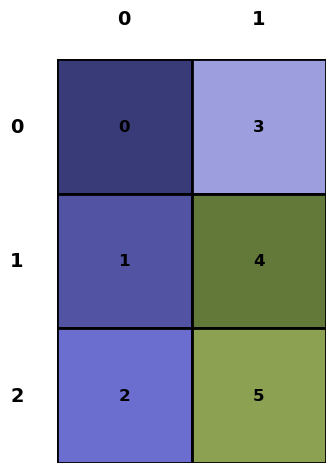

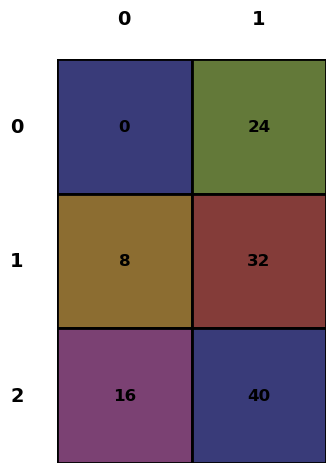

In [36]:
Layout(shape=(6, 8), stride=(8, 1)).visualize() # Base
Layout(shape=(3, 2), stride=(1, 3)).visualize() # Tiler
Layout(shape=(3, 2), stride=(8, 24)).visualize() # Composed

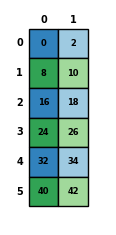

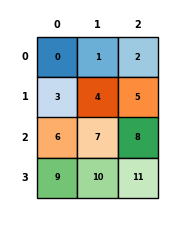

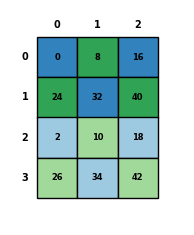

In [38]:
A = visualize_and_return(cute.make_layout(shape=(6, 2), stride=(8, 2)))
B = visualize_and_return(cute.make_layout(shape=(4, 3), stride=(3, 1)))
R = visualize_and_return(cute.make_layout(shape=((2, 2), 3), stride=((24, 2), 8)))

```
R( 0) = A(B( 0)) = A(B(0,0)) = A( 0) = A(0,0) =  0
R( 1) = A(B( 1)) = A(B(1,0)) = A( 3) = A(3,0) = 24
R( 2) = A(B( 2)) = A(B(2,0)) = A( 6) = A(0,1) =  2
R( 3) = A(B( 3)) = A(B(3,0)) = A( 9) = A(3,1) = 26
R( 4) = A(B( 4)) = A(B(0,1)) = A( 1) = A(1,0) =  8
R( 5) = A(B( 5)) = A(B(1,1)) = A( 4) = A(4,0) = 32
R( 6) = A(B( 6)) = A(B(2,1)) = A( 7) = A(1,1) = 10
R( 7) = A(B( 7)) = A(B(3,1)) = A(10) = A(4,1) = 34
R( 8) = A(B( 8)) = A(B(0,2)) = A( 2) = A(2,0) = 16
R( 9) = A(B( 9)) = A(B(1,2)) = A( 5) = A(5,0) = 40
R(10) = A(B(10)) = A(B(2,2)) = A( 8) = A(2,1) = 18
R(11) = A(B(11)) = A(B(3,2)) = A(11) = A(5,1) = 42
```
Ref: https://github.com/NVIDIA/cutlass/blob/acb45938e9cb3e4db8c1d75155b63d31791e0e5d/media/docs/cpp/cute/02_layout_algebra.md#composition